Graph and csv showing maximum number of mails were sent in which month

In [52]:
import os
from email.parser import Parser
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import csv
import datetime
import dateutil.parser as parser
import matplotlib.pyplot as plt

In [2]:
dir1=r"C:\Users\ishac\enron_mail_20150507\skilling-j\sent_items"   #Directory of the emails sent from one time CEO

C:\Users\ishac\enron_mail_20150507\skilling-j\sent_items [] 56


In [3]:
dir2=r'C:\Users\ishac\enron_mail_20150507\kitchen-l\sent_items

C:\Users\ishac\enron_mail_20150507\kitchen-l\sent_items [] 55


In [16]:

def email_analyse(inputfile, to_email_list, from_email_list, email_date):
    with open(inputfile, "r") as f:
        data = f.read()
        email = Parser().parsestr(data) 
    if email['to']:
        email_to = email['to']
        email_to = email_to.replace("\n", "")
        email_to = email_to.replace("\t", "")
        email_to = email_to.replace(" ", "")

        email_to = email_to.split(",")

        for email_to_1 in email_to:
            to_email_list.append(email_to_1)

    from_email_list.append(email['from'])
    email_date.append(email['date'])

In [17]:
to_email_list=[]
from_email_list=[]
email_date1=[]
for directory, subdirectory, filenames in  os.walk(dir1):
    for filename in filenames:
        email_analyse(os.path.join(directory, filename), to_email_list, from_email_list, email_date1)

In [18]:
to_email_list=[]
from_email_list=[]
email_date2=[]
for directory, subdirectory, filenames in  os.walk(dir2):
    for filename in filenames:
        email_analyse(os.path.join(directory, filename), to_email_list, from_email_list, email_date2)

In [44]:
date1=[]
for i in range(len(email_date1)):
    date1.append(parser.parse(email_date1[i]).month)
    

In [45]:
date2=[]
for i in range(len(email_date2)):
    date2.append(parser.parse(email_date2[i]).month)

In [46]:
master_date=date1+date2

In [51]:
di={}
for date in master_date:
        if date in di:
            di[date]=di[date]+1
        else:
            di[date]=1
            
print(di)

{5: 27, 8: 6, 4: 21, 2: 102, 9: 80, 1: 371, 7: 2, 10: 388, 11: 39, 12: 150}


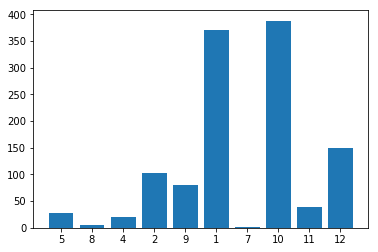

In [53]:
plt.bar(range(len(di)), di.values(), align='center')
plt.xticks(range(len(di)), list(di.keys()))
plt.show()

In [57]:
with open('MonthlyMailLog.csv','w') as csvfile:
    writer = csv.writer(csvfile)  
    writer.writerow(di.keys())
    writer.writerow(di.values())
        

In [ ]:
x=[]
y=[]
with open('data.csv','r') as file:
    reader=csv.reader(file)
    next(reader,None) #Ignoring the headers from the csv file
    for row in reader:
        x.append(math.log10(int(row[1])))
        y.append(math.log10(int(row[2])))
plt.plot(x,y)
plt.xlabel('Log-Rank',fontweight='bold')
plt.ylabel('Log-Frequency',fontweight='bold')
plt.title("Zipf's Law for reuters corpora",fontweight='bold')
plt.show()